#### [**Mathematical Modeling of Unsteady Inviscid Flows**](https://www.springer.com/gp/book/9783030183189)
**by Jeff D. Eldredge** (Springer, 2019)

This Jupyter notebook and associated code serve as a companion to the book. The notebook is powered by the [`PotentialFlow`](https://github.com/darwindarak/PotentialFlow.jl) package, written in the [Julia language](https://julialang.org/) by Darwin Darakananda and Jeff D. Eldredge, UCLA. *The code is released under the [MIT license](https://opensource.org/licenses/MIT).*
<hr />

<!--NAVIGATION-->
< [Corner and wedge flows](3.3-CornerWedge.ipynb) | [Contents](Index.ipynb) | [Next notebook](Index.ipynb) >

<a id='top'></a>
## Corner and wedge flows (continued)

Here, we continue our inspection of corner and wedge flows. To summarize what we learned in the previous notebook, the complex potential has the form

$$F(z) = i\sigma (z n_0^*)^{1/\nu}$$

where $\sigma$ is the signed intensity, $n_0$ is the vector of the bisector, and $\nu$ is the factor that defines the corner angle, $\nu\pi$.

The associated complex velocity comes equation (3.94):

$$ w(z) = i\sigma \left( \dfrac{L n_0}{z}\right)^{1-1/\nu}n_0^*$$

#### The usual preparatory steps.

In [1]:
using PotentialFlow
using Plots
pyplot()

Plots.PyPlotBackend()

#### Using corners in `PotentialFlow`

To make the plotting a little bit simpler for the remainder of this notebook, we will make use of some tools from the `PotentialFlow` package that perform calculations and plotting of corner flows.

In [2]:
# signed intensity
σ = 1.0

# factor on interior angle of the corner (νπ).
ν = 0.6;

# angle of bisector
θ̄ = π/2

# apply the function to set up a corner
c = Corner(σ,ν,θ̄)

Corner{1}(1.0, 0.6, 6.123233995736766e-17 + 1.0im, 1.0)

Here is the syntax for this function:

In [3]:
?Corner

search: Corner Corners ColorantNormed code_warntype @code_warntype



```
Corner{N} <: Elements.Element
```

An immutable structure representing a corner (`N=1`)/wedge (`N=2`)

## Fields

  * `σ::Real`: signed intensity
  * `ν::Real`: interior angle factor (angle is νπ)
  * `n₀::ComplexF64`: vector of bisector of interior angle
  * `L::Real` : characteristic length of corner

## Constructors

  * `Corner(σ,ν,θ)` : set up a corner with a bisector at angle `θ` and length `L=1`
  * `Wedge(σ,ν,θ)`  : set up a wedge with a bisector at angle `θ` and length `L=1`


To inspect it, just type

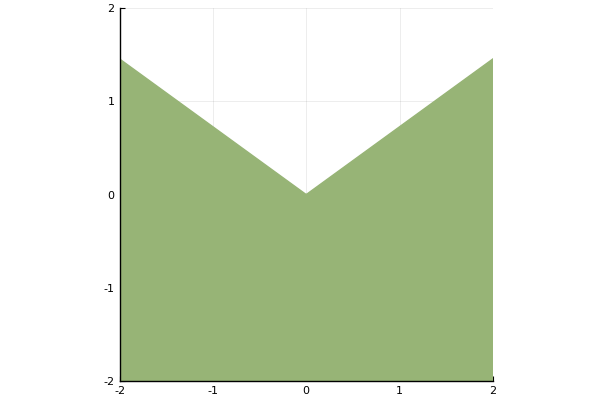

In [6]:
plot(c,xlims=(-2,2),ylim=(-2,2))

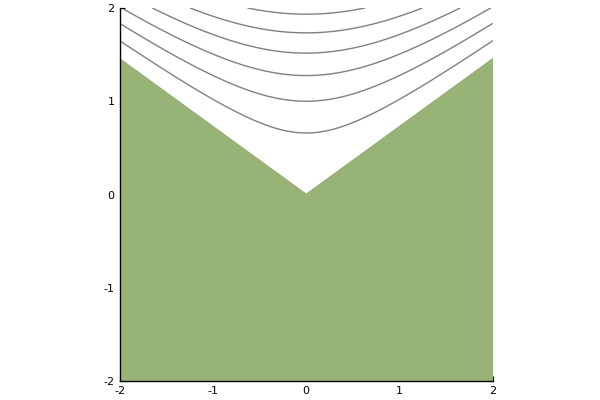

In [4]:
x = range(-2,2,length=201)
y = range(-2,2,length=201)
streamlines(x,y,c,ratio=1,legend=:false,xlims=(-2,2),ylims=(-2,2))
plot!(c)

[Return to top of notebook](#top)

#### Wedge flows

As discussed on page 56 of the book, the complex potential we constructed above can also be interpreted as a **wedge flow** if we bound the flow region by two non-adjacent stagnation streamlines, so that the region's angle is $2\nu\pi$ rather than $\nu \pi$.

We can plot the wedge with our convenience function `wedge`:

In [7]:
ν = 0.5
θ̄ = 6π/5
w = Wedge(σ,ν,θ̄)

Corner{2}(1.0, 0.5, -0.8090169943749475 - 0.587785252292473im, 1.0)

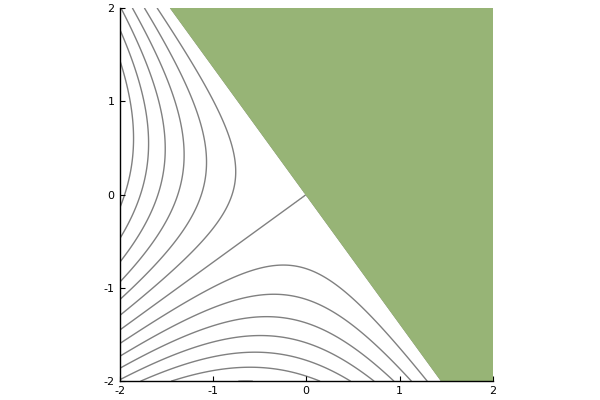

In [8]:
x = range(-2,2,length=201)
y = range(-2,2,length=201)
streamlines(x,y,w,ratio=1,legend=:false,xlims=(-2,2),ylims=(-2,2))
plot!(w)

#### Velocity and pressure along the corner wall

Let's inspect the velocity and pressure distributions for different choices of corners. 

In [9]:
# signed intensity
σ = 1.0

# factor on interior angle of the corner (νπ).
ν = 1.5

# angle of bisector
θ̄ = π/2; 

In [10]:
c = Corner(σ,ν,θ̄)

Corner{1}(1.0, 1.5, 6.123233995736766e-17 + 1.0im, 1.0)

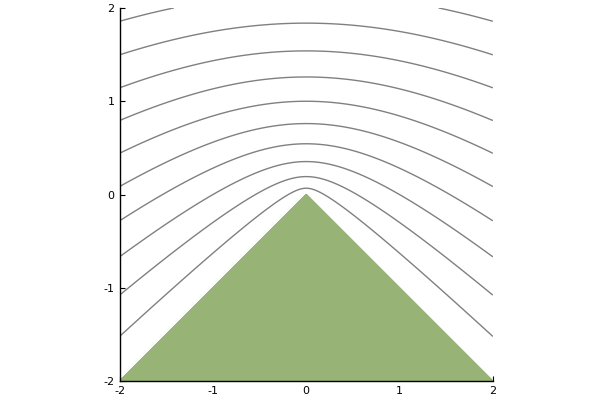

In [11]:
x = range(-2,2,length=201)
y = range(-2,2,length=201)
streamlines(x,y,c,ratio=1,legend=:false,xlims=(-2,2),ylims=(-2,2))
plot!(c)

Set up an array of points along the walls that define the corner:

In [13]:
# radial positions along each ray
n = 201
xmax = 2.0
r = range(1e-8,xmax;length=n)

# wall 1 (ccw from bisector)
τ₁ = exp(im*(angle(c)+0.5π*ν)) # tangent vector
z₁ = reverse(r[2:end])*τ₁ # evaluation points, from outward to inward

# wall 2 (cw from bisector)
τ₂ = exp(im*(angle(c)-0.5π*ν)) # tangent vector
z₂ = r[2:end]*τ₂ # evaluation points, from inward to outward

# put the points together
z = vcat(collect(z₁),collect(z₂))
τ = vcat(τ₁*ones(n-1),τ₂*ones(n-1))

# arc length along the walls
s = vcat(xmax.-abs.(collect(z₁)),xmax.+abs.(collect(z₂)));

Plot the evaluation points so that we can see where they are:

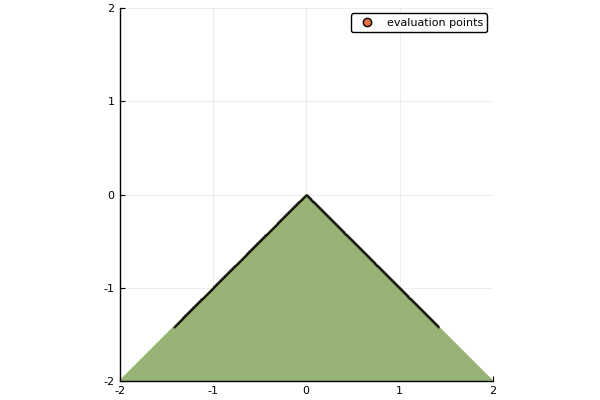

In [14]:
plot(c,xlims=(-2,2),ylims=(-2,2),label="")
scatter!(real.(z),imag.(z),markersize=0.5,label="evaluation points",legend=:true)

Now evaluate the velocity at each of the points in `z`. (Note that we need to take the conjugates of the output of `induce_velocity`, because this function returns the velocity in the form $u+iv$ rather than the usual $u-iv$.)

In [15]:
w = conj(induce_velocity(z,c,0.0));

Now we can get the tangent and normal components. Here we make use of equation (3.84) to get the radial component (which is $u_\tau$) and the circumferential component (which is $u_n$), and $\tau = e^{i\theta}$.

In [16]:
uτ = real(τ.*w)
un = imag(τ.*w);

Plot the velocity components versus arc length:

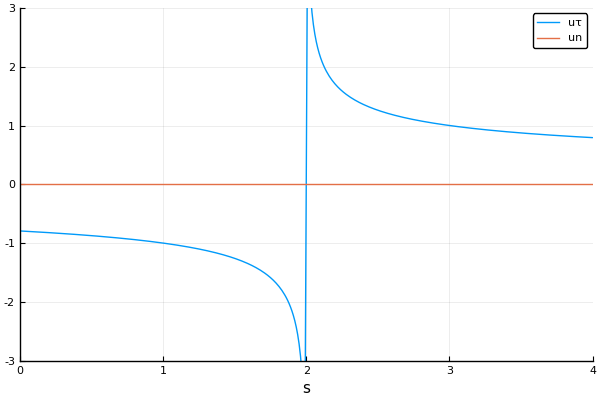

In [17]:
plot(s,uτ,ylims=(-3,3),xlims=(0,2xmax),xlabel="s",label="uτ")
plot!(s,un,label="un")

- First of all, note that $u_n$ is always zero. This demonstrates that the no-flow-through condition is satisfied, as we would expect, since the walls are streamlines.
- The tangent velocity is negative on the left wall (indicating flow toward the corner) and positive on the right wall (flow away from the corner), as one would expect to ensure conservation of mass.
- Also note that the tangent velocity is **discontinuous and infinite** at the corner (halfway along the arc length). This is true for all cases of corner angles larger than $\pi$ (i.e., $\nu > 1$). In contrast, if you go back and change $\nu$ to a value less than 1, then you will find the tangent velocity is smooth and continuous at the origin.
- Now let's look at the pressure. For this, we will define a pressure coefficient as

$$C_p = \dfrac{p}{\frac{1}{2}\rho \sigma^2}$$

Note that the signed intensity, $\sigma$, has units of velocity, and represents a characteristic velocity for the corner region. This is why we normalize pressure in this manner.

In [18]:
Cp = -abs.(w).^2/σ^2;

Now plot this pressure coefficient versus arc length

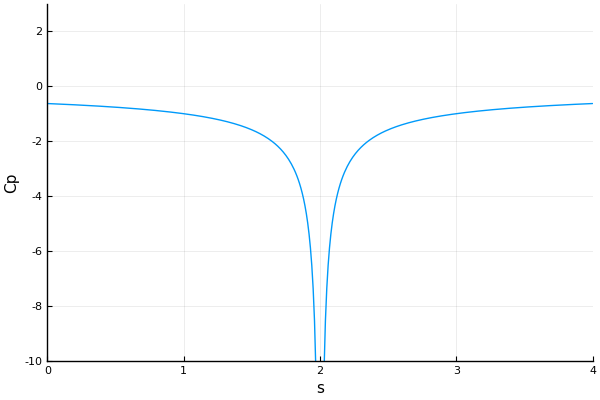

In [19]:
plot(s,Cp,ylims=(-10,3),xlims=(0,2xmax),xlabel="s",ylabel="Cp",legend=:false)

The pressure is $-\infty$ at the origin. In fact, this is the cause of what is known as *edge suction*, since the flow induces a suction pressure on the corner as it flows past it. The integral of this pressure over the wall is actually *finite*, not infinity. (This calculation, performed in Section 6.4, is a bit tricky because the normal is not uniquely defined in the region where the pressure is infinite.)

[Return to top of notebook](#top)

<!--NAVIGATION-->
< [Corner and wedge flows](3.3-CornerWedge.ipynb) | [Contents](Index.ipynb) | [Next notebook](Index.ipynb) >